## Data Loading 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Load the dataset
file_path = 'insurance_claims.csv' 
data = pd.read_csv(file_path)

In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insur

In [6]:
# Preview the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())


First 5 Rows:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       46

## Exploratory Data Analysis (EDA)

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
authorities_contacted      91
_c39                     1000
dtype: int64


In [14]:
# Data types of each column
print("\nData Types:")
print(data.dtypes)


Data Types:
months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hou

In [16]:
# Basic statistics
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   

In [18]:
# Five-number summary for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    print(f"\nFive-number summary for {col}:")
    print(data[col].describe(percentiles=[0.25, 0.5, 0.75]))


Five-number summary for months_as_customer:
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

Five-number summary for age:
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

Five-number summary for policy_number:
count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64

Five-number summary for policy_deductable:
count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

Five-numb

In [20]:
# Identify columns with extreme outliers and create an outlier summary
def detect_outliers_iqr(data, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers below and above bounds
        lower_outliers = (data[col] < lower_bound).sum()
        upper_outliers = (data[col] > upper_bound).sum()
        total_outliers = lower_outliers + upper_outliers

        # Add to summary if outliers exist
        if total_outliers > 0:
            outlier_summary[col] = {
                'Lower Outliers': lower_outliers,
                'Upper Outliers': upper_outliers,
                'Total Outliers': total_outliers,
                'Outlier Percentage': (total_outliers / len(data)) * 100
            }

    return pd.DataFrame.from_dict(outlier_summary, orient='index')

# Select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Generate the outlier summary
outlier_summary = detect_outliers_iqr(data, numerical_columns)

# Display the summary
if not outlier_summary.empty:
    print("Outlier Summary:")
    print(outlier_summary)
else:
    print("No extreme outliers detected.")

Outlier Summary:
                       Lower Outliers  Upper Outliers  Total Outliers  \
age                                 0               4               4   
policy_annual_premium               4               5               9   
umbrella_limit                      1             201             202   
total_claim_amount                  0               1               1   
property_claim                      0               6               6   

                       Outlier Percentage  
age                                   0.4  
policy_annual_premium                 0.9  
umbrella_limit                       20.2  
total_claim_amount                    0.1  
property_claim                        0.6  


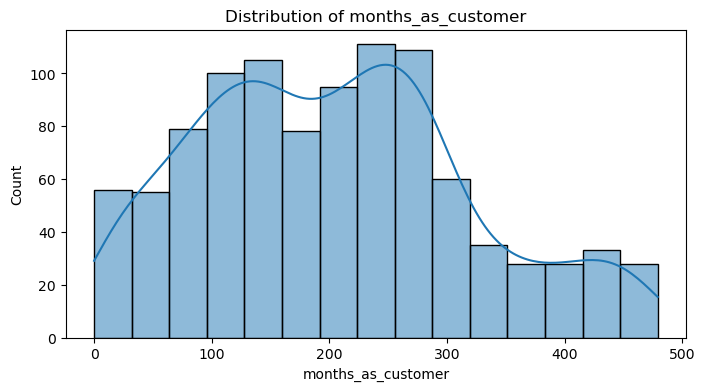

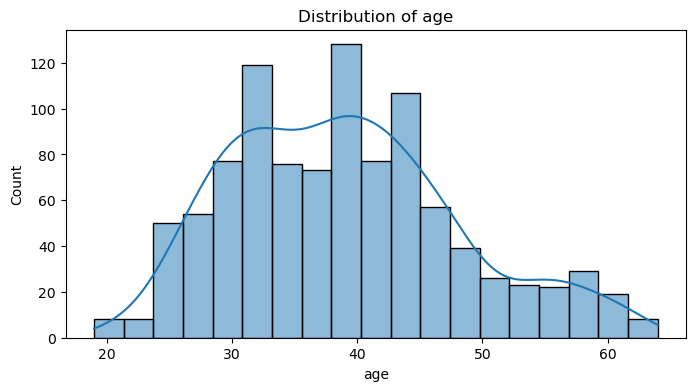

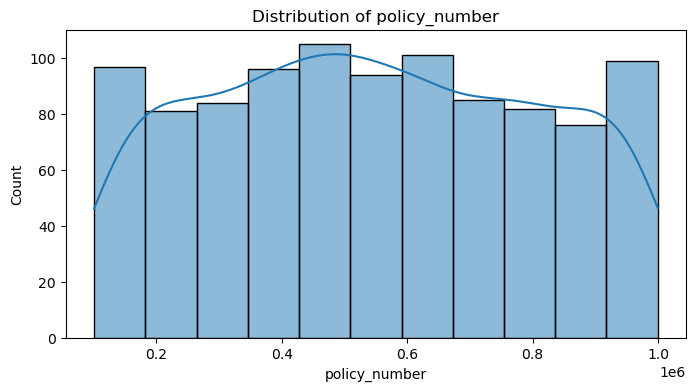

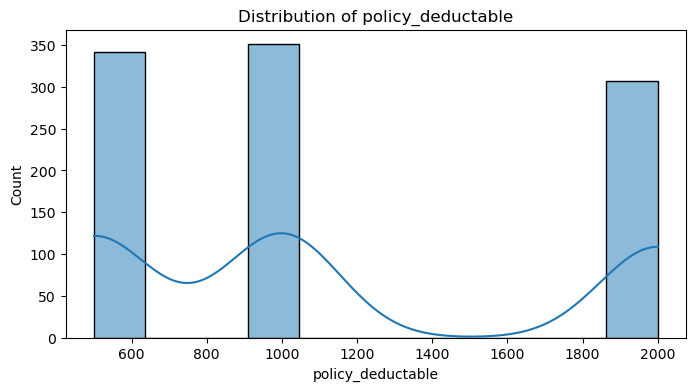

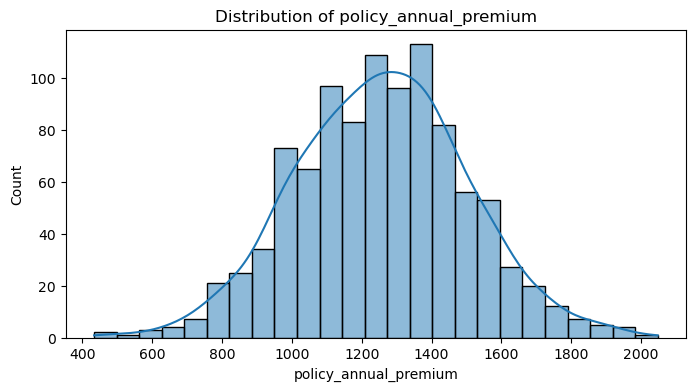

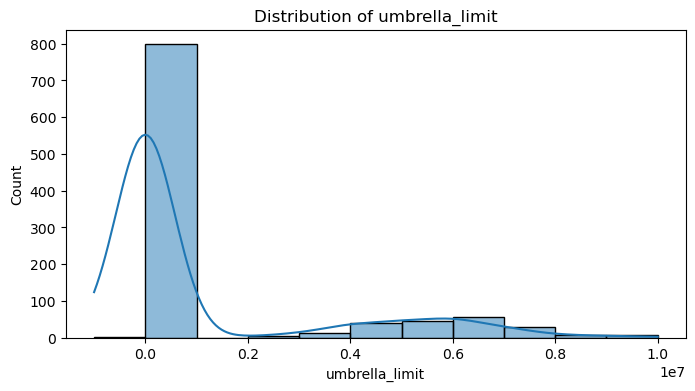

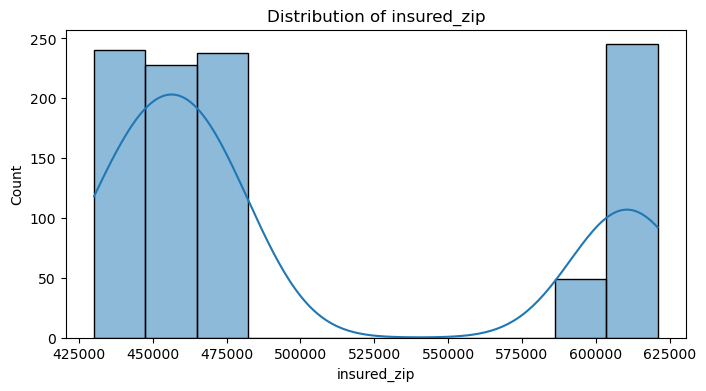

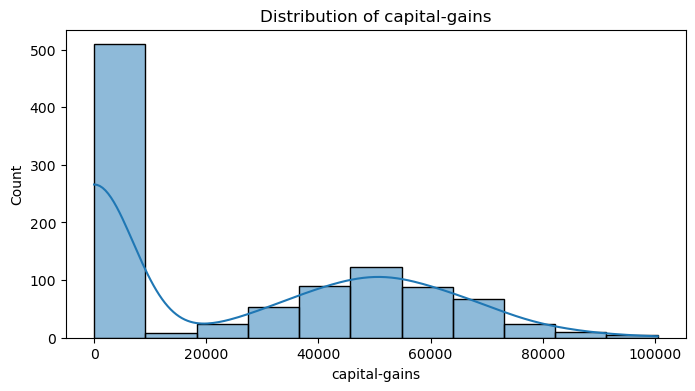

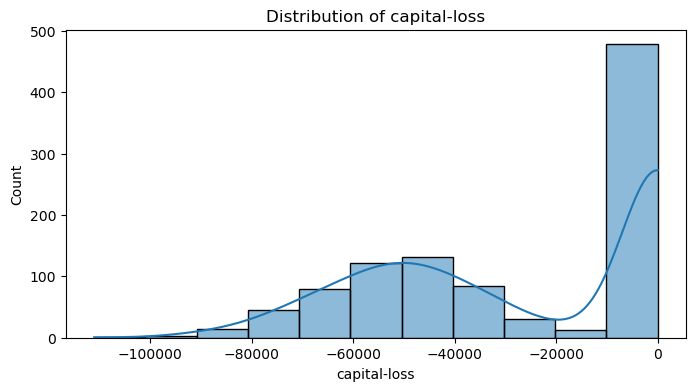

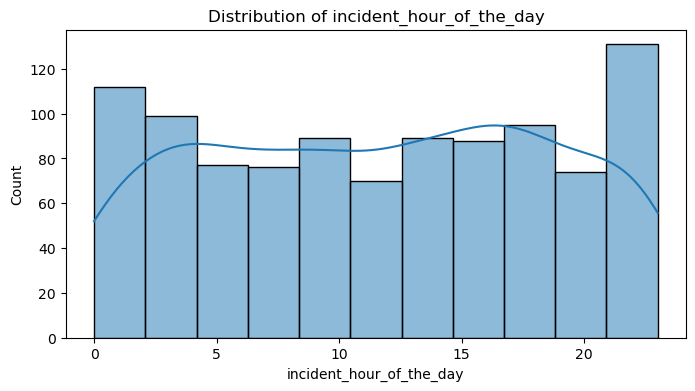

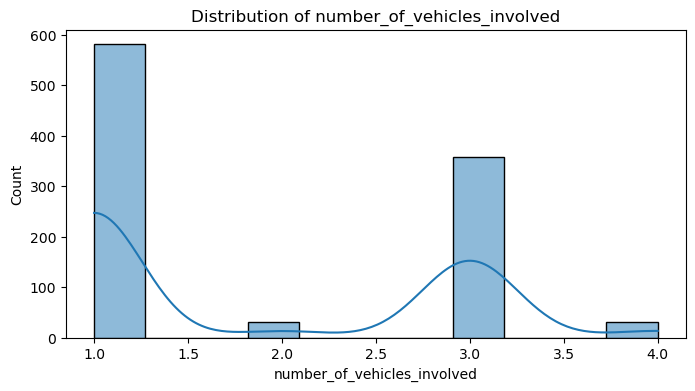

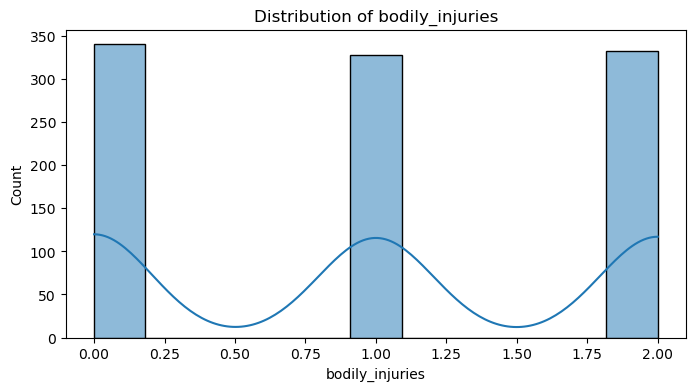

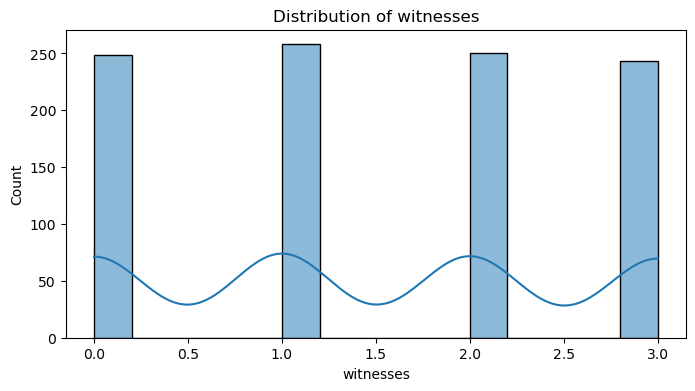

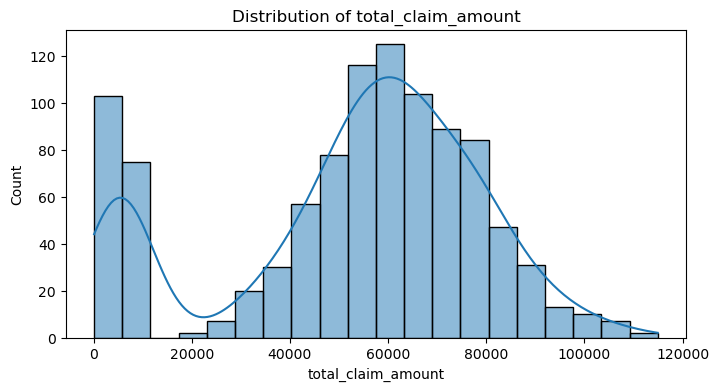

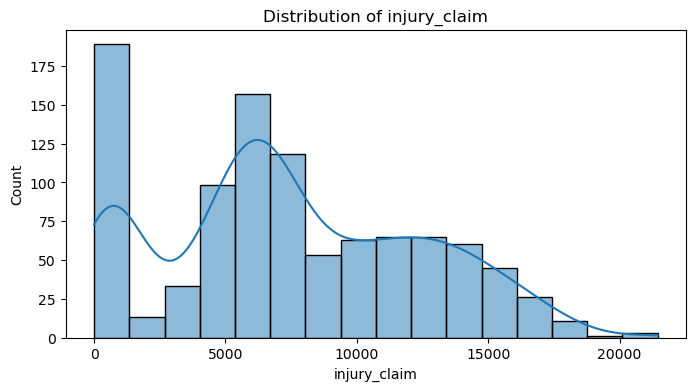

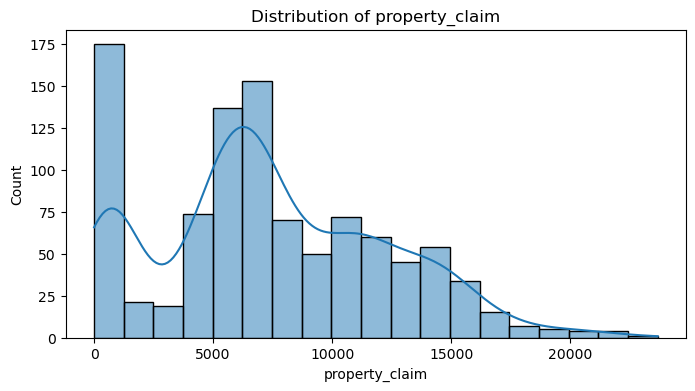

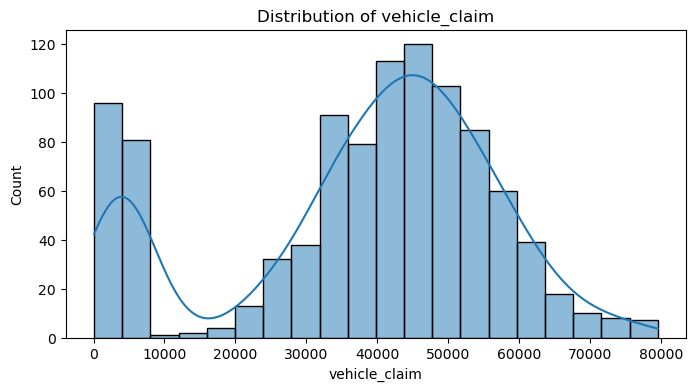

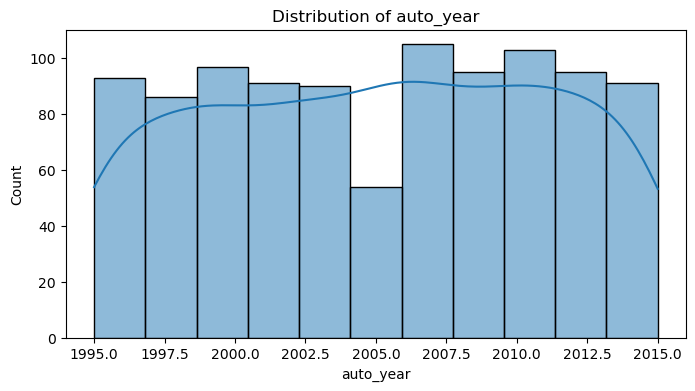

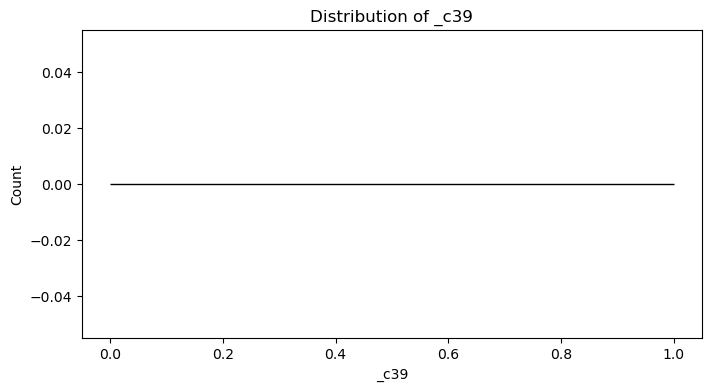

In [22]:
# Distribution plots for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

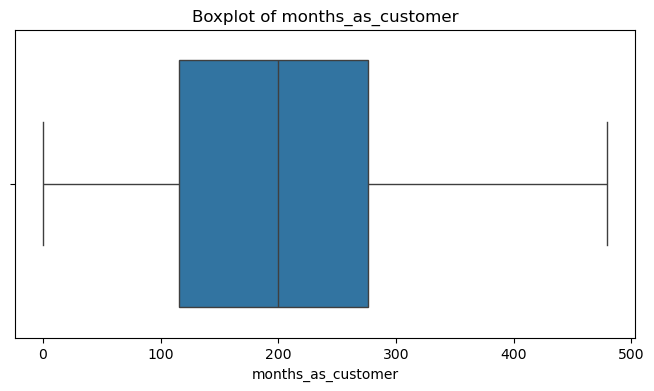

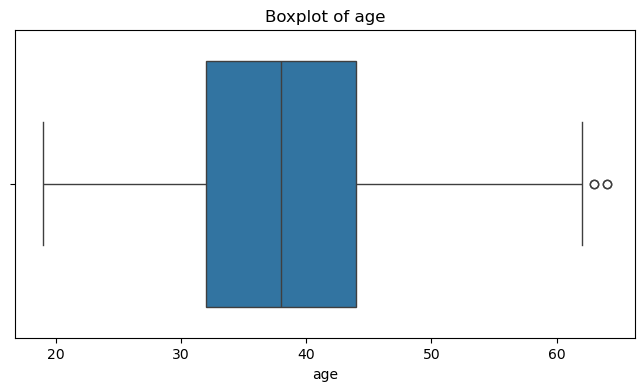

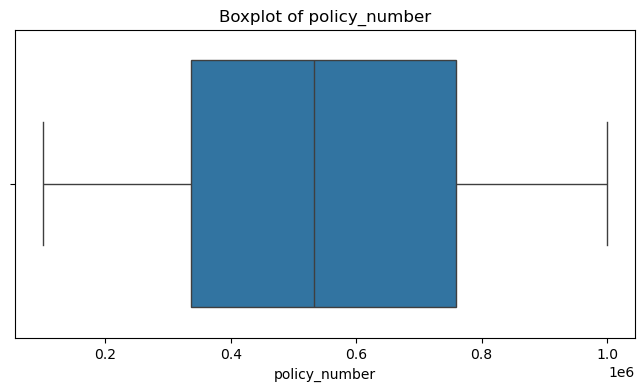

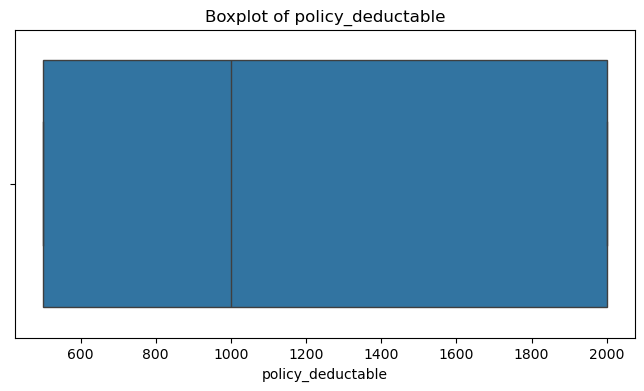

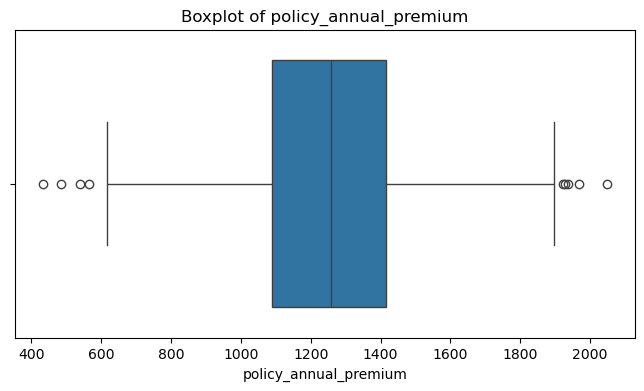

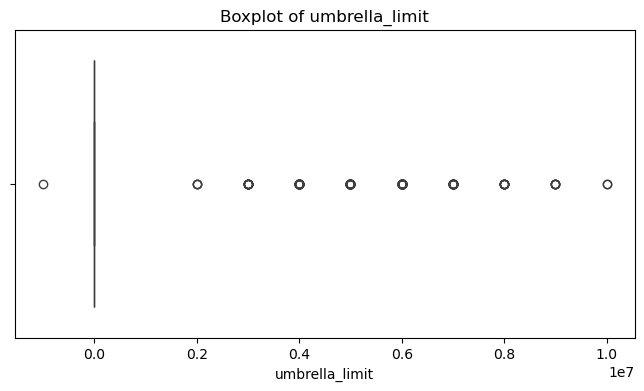

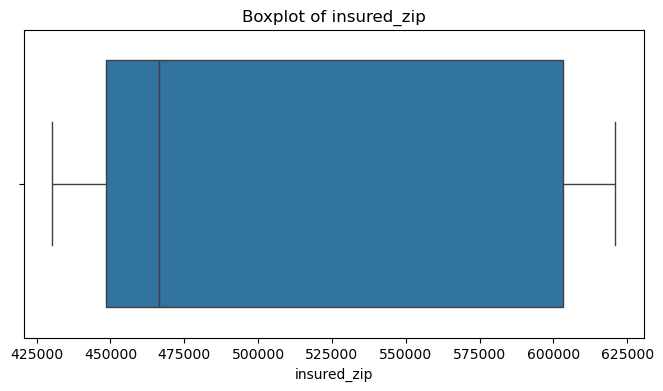

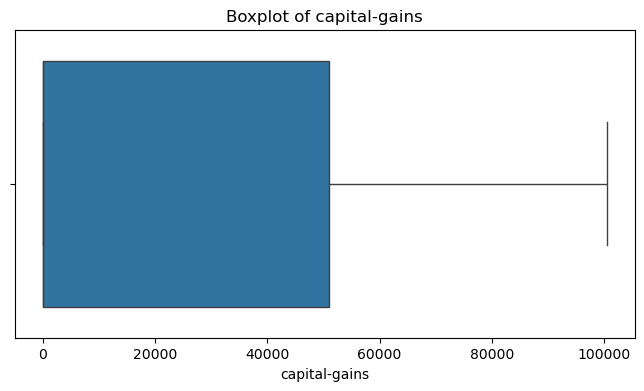

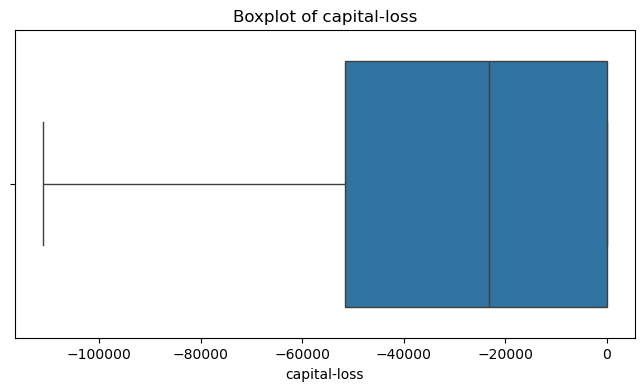

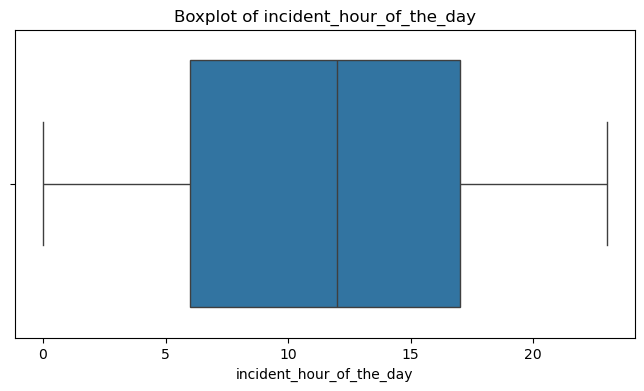

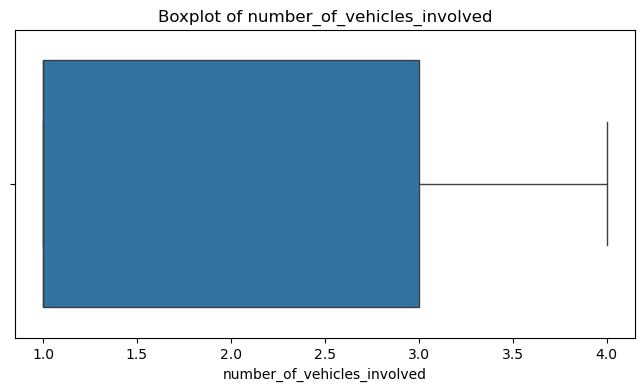

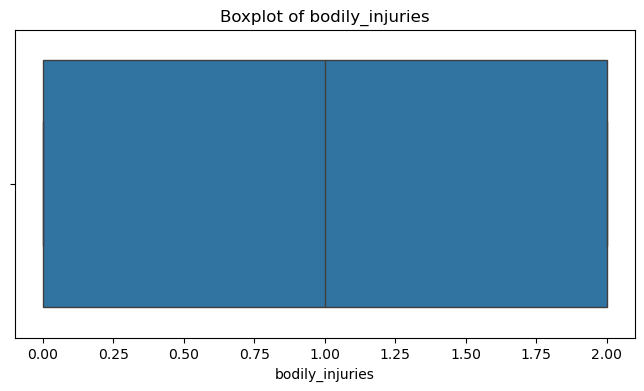

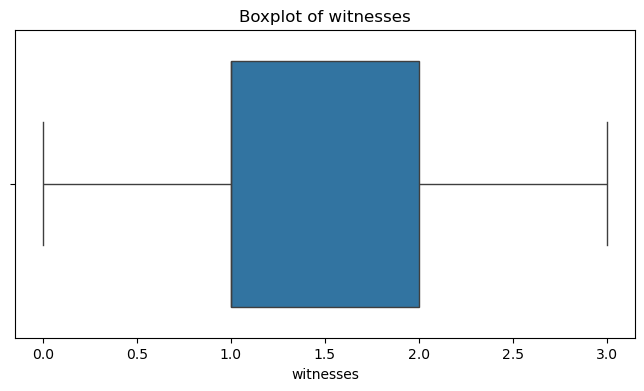

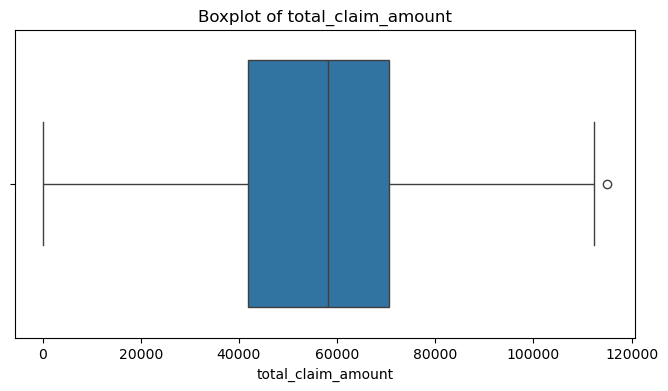

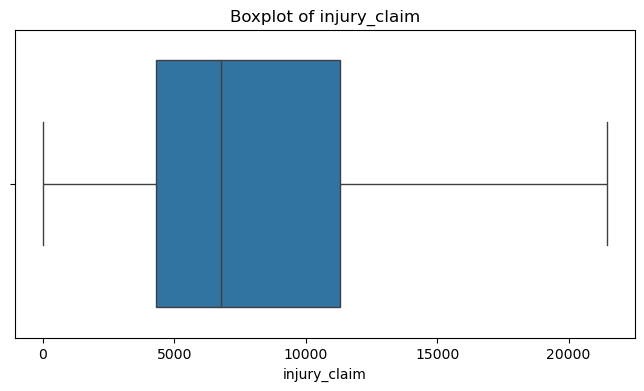

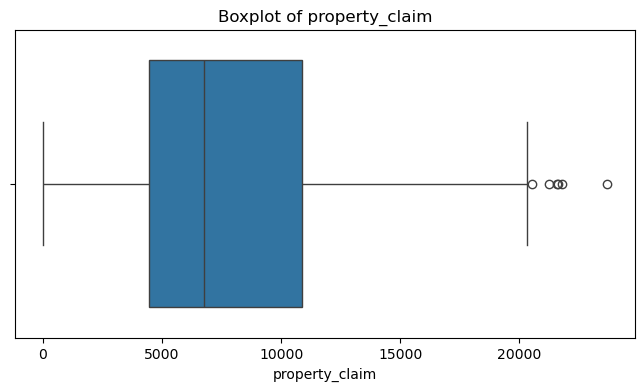

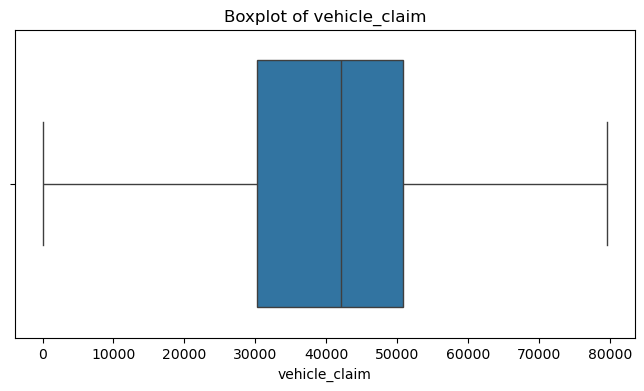

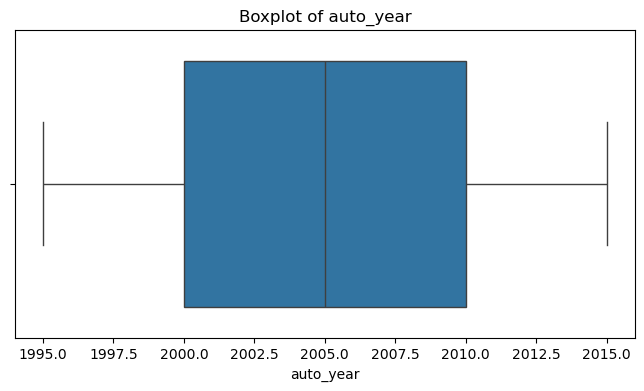

Skipping boxplot for _c39 (not enough unique values).


In [23]:
# Box plots for outlier detection
for col in numerical_columns:
    if data[col].nunique() > 1:  # Ensure the column has more than one unique value
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    else:
        print(f"Skipping boxplot for {col} (not enough unique values).")

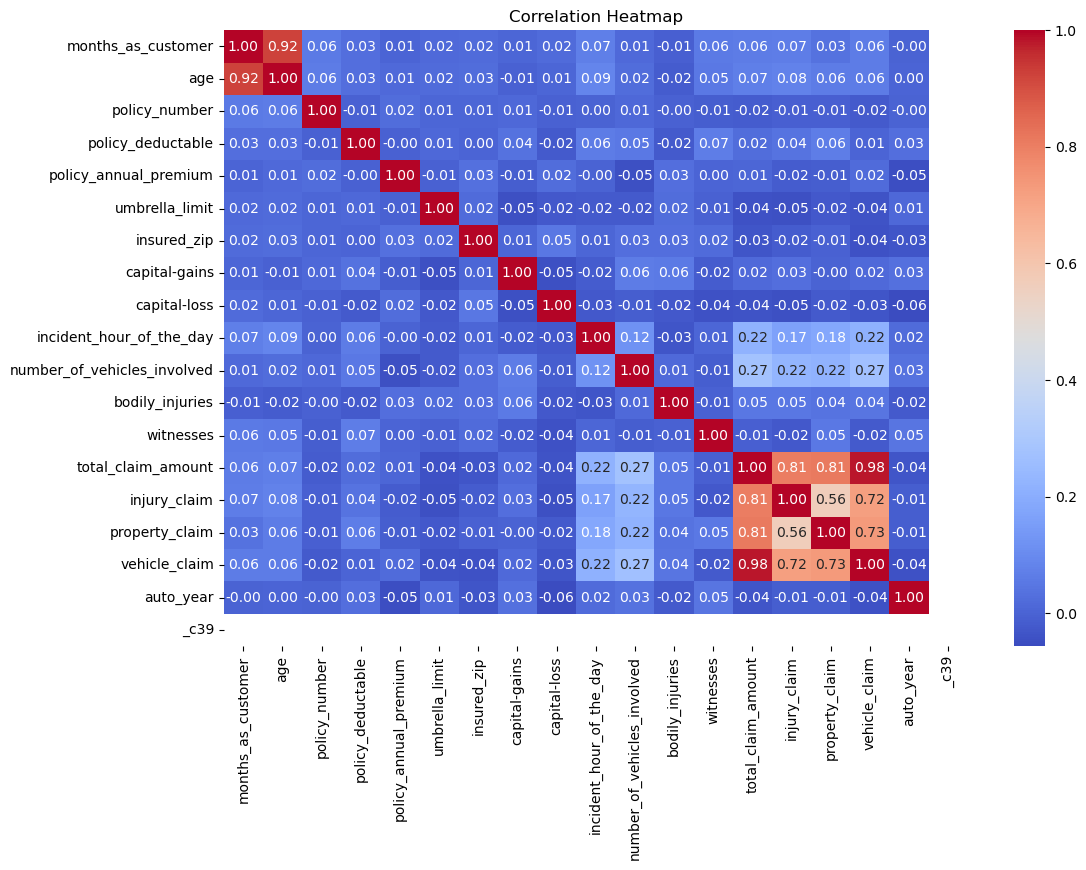

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
df = data.copy()

In [34]:
# Step 1. Drop unnecessary columns
# '_c39' is fully null and can be dropped
if '_c39' in df.columns:
    df.drop('_c39', axis=1, inplace=True)

# Check if 'policy_number', 'incident_location', or other ID-like features should be dropped
# because they don't add predictive value.
if 'policy_number' in df.columns:
    df.drop('policy_number', axis=1, inplace=True)

if 'incident_location' in df.columns:
    df.drop('incident_location', axis=1, inplace=True)

In [36]:
# Step 2. Handle special placeholders for missing values
# Identify columns with "?" placeholders and convert them to NaN
cols_with_question = ['authorities_contacted', 'property_damage', 'police_report_available']
for col in cols_with_question:
    if col in df.columns:
        df[col] = df[col].replace('?', np.nan)

In [38]:
# Step 3. Handle missing values
# Categorical columns with missing values:
# For example, 'authorities_contacted' may be categorical, so impute with the mode.
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Check numerical columns with missing values (in this dataset, doesn't seem like we have any except _c39 which was dropped)
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='mean')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

In [40]:
# Step 4. Handle outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

outlier_cols = ['umbrella_limit', 'policy_annual_premium', 'property_claim', 'total_claim_amount', 'age']
for col in outlier_cols:
    if col in df.columns:
        cap_outliers(df, col)

In [42]:
# Step 5. Convert date columns if needed
# 'policy_bind_date' and 'incident_date' might be useful features, convert them to datetime
# or drop them if they are not relevant.
if 'policy_bind_date' in df.columns:
    df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')

if 'incident_date' in df.columns:
    df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Optionally, create new features from dates (like year, month) and then drop the date if it's not directly useful.
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df.drop(['policy_bind_date','incident_date'], axis=1, inplace=True)

In [44]:
# Step 6. Encode categorical variables
# Separate target variable first
target = 'fraud_reported'
y = df[target].copy()
X = df.drop(target, axis=1)

# Label encode binary categorical features, OneHot encode others if needed.
# For simplicity, use LabelEncoder for all categorical columns. 
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [46]:
# Step 7. Feature scaling
# Scale numeric features using StandardScaler
num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [48]:
# Step 8. Final check and data split
# At this stage, X and y are ready for modeling.
print("Preprocessing complete.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.head())
print(y.head())

Preprocessing complete.
X shape: (1000, 37)
y shape: (1000,)
   months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.078140  0.993200      1.187173    0.060937          -0.222383   
1            0.208995  0.335307     -0.016856    0.060937           1.412784   
2           -0.608002 -1.090130      1.187173   -1.182668           1.412784   
3            0.452355  0.225658     -1.220886    0.060937           1.412784   
4            0.208995  0.554604     -1.220886    1.304542          -0.222383   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.621182             0.0    -0.489529     1.076953   
1              -0.244857             0.0    -0.461008     1.076953   
2               0.646913             0.0    -0.984885    -0.928546   
3               0.657651             0.0     1.491682    -0.928546   
4               1.352209             0.0     1.527808     1.076953   

   insured_education_level  ...  tota

## Modeling

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

In [54]:
# Step 1: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (800, 37)
Test set shape: (200, 37)


In [56]:
# Step 2: Baseline Model (Logistic Regression)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

=== Logistic Regression Performance ===
Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           N       0.77      0.88      0.82       145
           Y       0.50      0.33      0.40        55

    accuracy                           0.72       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.70      0.72      0.70       200



In [58]:
# Step 3: Evaluation Metrics Setup
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance on Test Set:
Accuracy: 0.725
Confusion Matrix:
 [[127  18]
 [ 37  18]]
Classification Report:
               precision    recall  f1-score   support

           N       0.77      0.88      0.82       145
           Y       0.50      0.33      0.40        55

    accuracy                           0.72       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.70      0.72      0.70       200



In [60]:
# Step 3: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n=== Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree Performance ===
Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           N       0.81      0.81      0.81       145
           Y       0.50      0.51      0.50        55

    accuracy                           0.72       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.73      0.72      0.73       200



In [62]:
# Step 4: Random Forest (Default and Tuned)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest (Default) Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\n=== Tuned Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


=== Random Forest (Default) Performance ===
Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

           N       0.80      0.90      0.85       145
           Y       0.61      0.42      0.49        55

    accuracy                           0.77       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.75      0.77      0.75       200


=== Tuned Random Forest Performance ===
Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

           N       0.78      0.89      0.83       145
           Y       0.53      0.33      0.40        55

    accuracy                           0.73       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.71      0.73      0.71       200



In [63]:
# Step 5: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\n=== Naive Bayes Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


=== Naive Bayes Performance ===
Accuracy: 0.7


In [64]:
# Step 6: Support Vector Machines (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n=== SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


=== SVM Performance ===
Accuracy: 0.71


In [65]:
# Convert y_test to binary (numeric) labels for compatibility
y_test_binary = y_test.map({'N': 0, 'Y': 1})

# Step 7: K-Means Clustering (Unsupervised with Labels)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Since K-Means does not guarantee label alignment, relabeling is necessary
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode

# Align K-Means labels with ground truth
def align_kmeans_labels(true_labels, predicted_labels):
    labels_aligned = np.zeros_like(predicted_labels)
    for i in np.unique(predicted_labels):
        mask = predicted_labels == i
        labels_aligned[mask] = mode(true_labels[mask])[0]
    return labels_aligned

kmeans_labels_aligned = align_kmeans_labels(y_test_binary, kmeans_labels)

print("\n=== K-Means Clustering Performance ===")
print("Accuracy:", accuracy_score(y_test_binary, kmeans_labels_aligned))
print("Classification Report:\n", classification_report(y_test_binary, kmeans_labels_aligned))


=== K-Means Clustering Performance ===
Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# Step 8: Feature Selection with RFE
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=20)
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

log_reg_sel = LogisticRegression(max_iter=1000, random_state=42)
log_reg_sel.fit(X_train_sel, y_train)
y_pred_sel = log_reg_sel.predict(X_test_sel)
print("\n=== Logistic Regression with Feature Selection ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sel))


=== Logistic Regression with Feature Selection ===
Accuracy: 0.735


In [67]:
# Step 9: PCA (Dimensionality Reduction)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

log_reg_pca = LogisticRegression(max_iter=1000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
print("\n=== Logistic Regression after PCA ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))


=== Logistic Regression after PCA ===
Accuracy: 0.725


In [68]:
from sklearn.metrics import accuracy_score

# Map the ground truth `y_test` to numeric labels
y_test_binary = y_test.map({'N': 0, 'Y': 1})

# Convert all model predictions to numeric labels (if they are in string format)
def convert_to_numeric(predictions):
    return np.where(predictions == 'N', 0, 1)

# Ensure consistency across all predictions
y_pred_log_numeric = convert_to_numeric(y_pred_log)
y_pred_dt_numeric = convert_to_numeric(y_pred_dt)
y_pred_rf_numeric = convert_to_numeric(y_pred_rf)
y_pred_best_rf_numeric = convert_to_numeric(y_pred_best_rf)
y_pred_nb_numeric = convert_to_numeric(y_pred_nb)
y_pred_svm_numeric = convert_to_numeric(y_pred_svm)
y_pred_sel_numeric = convert_to_numeric(y_pred_sel)
y_pred_pca_numeric = convert_to_numeric(y_pred_pca)

# K-Means predictions are already numeric and aligned earlier
kmeans_labels_aligned = align_kmeans_labels(y_test_binary, kmeans_labels)

# Comparative Analysis Results
results = {
    "Logistic Regression": accuracy_score(y_test_binary, y_pred_log_numeric),
    "Decision Tree": accuracy_score(y_test_binary, y_pred_dt_numeric),
    "Random Forest (default)": accuracy_score(y_test_binary, y_pred_rf_numeric),
    "Random Forest (tuned)": accuracy_score(y_test_binary, y_pred_best_rf_numeric),
    "Naive Bayes": accuracy_score(y_test_binary, y_pred_nb_numeric),
    "SVM": accuracy_score(y_test_binary, y_pred_svm_numeric),
    "K-Means": accuracy_score(y_test_binary, kmeans_labels_aligned),
    "Logistic Reg (Feat. Sel.)": accuracy_score(y_test_binary, y_pred_sel_numeric),
    "Logistic Reg (PCA)": accuracy_score(y_test_binary, y_pred_pca_numeric),
}

# Print Comparative Analysis Results
print("\n=== Comparative Analysis ===")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.3f}")


=== Comparative Analysis ===
Logistic Regression: 0.725
Decision Tree: 0.725
Random Forest (default): 0.765
Random Forest (tuned): 0.735
Naive Bayes: 0.700
SVM: 0.710
K-Means: 0.725
Logistic Reg (Feat. Sel.): 0.735
Logistic Reg (PCA): 0.725


In [69]:
# === New Section: Random Forest Optimization + Ensemble Methods ===

In [70]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

In [82]:
# Step 1: RandomizedSearchCV for Random Forest Optimization
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Best Random Forest
best_rf_randomized = random_search.best_estimator_

# Evaluate on test data
y_pred_rf_randomized = best_rf_randomized.predict(X_test)
print("\n=== Optimized Random Forest (Randomized Search) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_randomized))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_randomized))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Optimized Random Forest (Randomized Search) ===
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           N       0.89      0.87      0.88       145
           Y       0.68      0.73      0.70        55

    accuracy                           0.83       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.83      0.83      0.83       200



In [84]:
# Step 2: Voting Classifier (Hard Voting)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('random_forest', best_rf_randomized),
        ('svc', svc)
    ],
    voting='hard'  # 'hard' for majority voting; 'soft' for probabilities
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("\n=== Voting Classifier (Hard Voting) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))


=== Voting Classifier (Hard Voting) ===
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           N       0.78      0.90      0.83       145
           Y       0.55      0.31      0.40        55

    accuracy                           0.74       200
   macro avg       0.66      0.61      0.61       200
weighted avg       0.71      0.74      0.71       200



In [85]:
# Step 3: Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('random_forest', best_rf_randomized),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),  # Meta-classifier
    cv=5
)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

print("\n=== Stacking Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))


=== Stacking Classifier ===
Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           N       0.86      0.90      0.88       145
           Y       0.71      0.62      0.66        55

    accuracy                           0.82       200
   macro avg       0.79      0.76      0.77       200
weighted avg       0.82      0.82      0.82       200



In [87]:
# Step 4: Comparative Analysis
results_ensemble = {
    "Random Forest (Optimized)": accuracy_score(y_test, y_pred_rf_randomized),
    "Voting Classifier": accuracy_score(y_test, y_pred_voting),
    "Stacking Classifier": accuracy_score(y_test, y_pred_stacking),
}

print("\n=== Ensemble Comparative Analysis ===")
for model_name, acc in results_ensemble.items():
    print(f"{model_name}: {acc:.3f}")


=== Ensemble Comparative Analysis ===
Random Forest (Optimized): 0.830
Voting Classifier: 0.740
Stacking Classifier: 0.825


In [88]:
# Visualizations

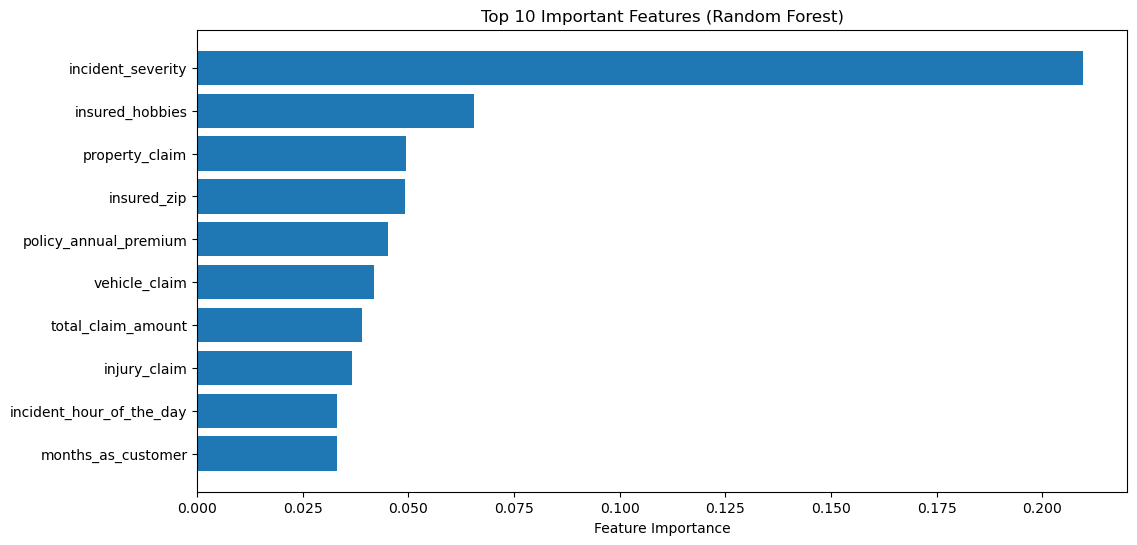

In [92]:
import matplotlib.pyplot as plt

# Feature Importance from Random Forest
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

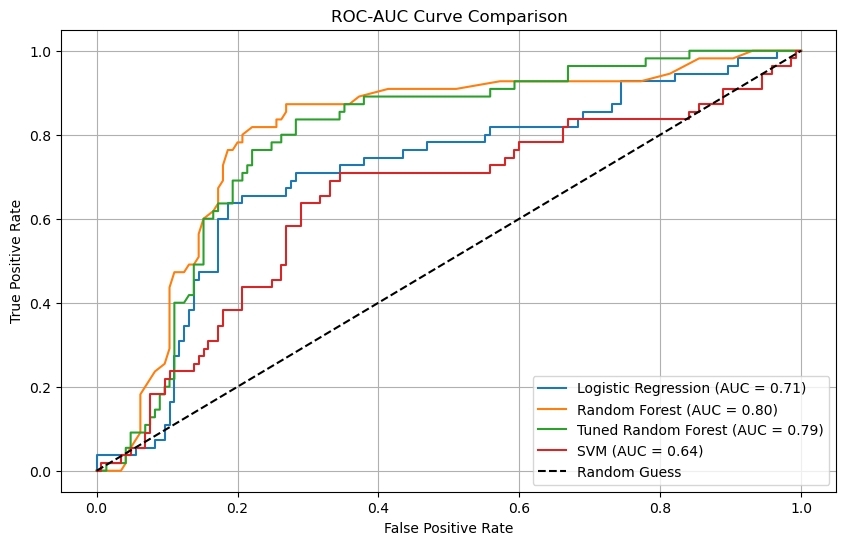

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Fit the models (assuming X_train and y_train are already defined)
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Probability scores for ROC-AUC (SVM uses decision_function)
models_proba = {
    "Logistic Regression": log_reg.predict_proba(X_test)[:, 1],
    "Random Forest": rf.predict_proba(X_test)[:, 1],
    "Tuned Random Forest": best_rf.predict_proba(X_test)[:, 1],
    "SVM": (svm.decision_function(X_test) - svm.decision_function(X_test).min()) /
           (svm.decision_function(X_test).max() - svm.decision_function(X_test).min())  # Normalize scores
}

# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, probas in models_proba.items():
    fpr, tpr, _ = roc_curve(y_test_binary, probas)
    auc_score = roc_auc_score(y_test_binary, probas)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

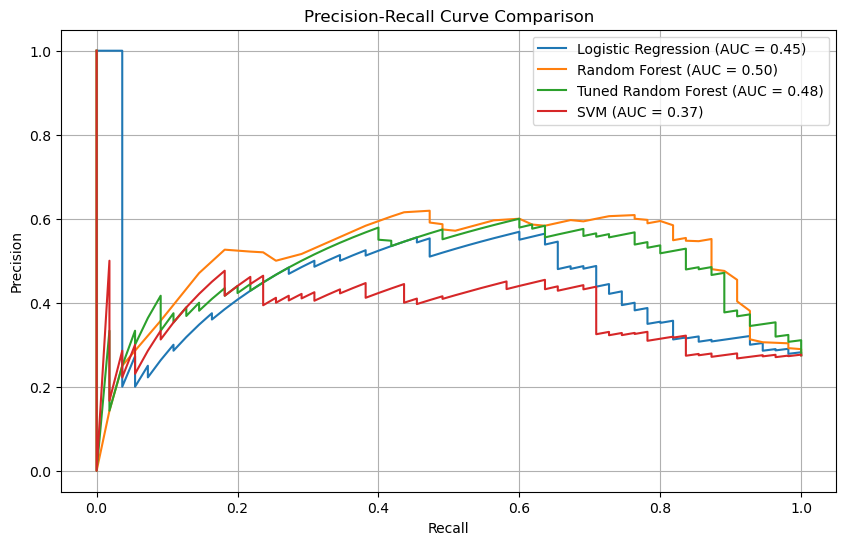

In [102]:
from sklearn.metrics import precision_recall_curve, auc

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
for name, probas in models_proba.items():
    precision, recall, _ = precision_recall_curve(y_test_binary, probas)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [112]:
import numpy as np

# Convert predictions to numeric if they are not already
def convert_to_numeric(predictions):
    # For string predictions like 'Y' and 'N', map them to 1 and 0
    return np.where(predictions == 'Y', 1, np.where(predictions == 'N', 0, predictions))

# Check for NaN values in all predictions
predictions = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Tuned Random Forest": y_pred_best_rf,
    "SVM": y_pred_svm,
}

# Convert predictions to numeric (int/float) if they are strings
predictions = {model: convert_to_numeric(preds) for model, preds in predictions.items()}

# Now check for NaN values
for model, preds in predictions.items():
    preds = np.asarray(preds, dtype=float)  # Ensure predictions are float
    if np.isnan(preds).any():
        print(f"Warning: {model} contains NaN values.")
    else:
        print(f"{model} does not contain NaN values.")

Logistic Regression does not contain NaN values.
Decision Tree does not contain NaN values.
Random Forest does not contain NaN values.
Tuned Random Forest does not contain NaN values.
SVM does not contain NaN values.


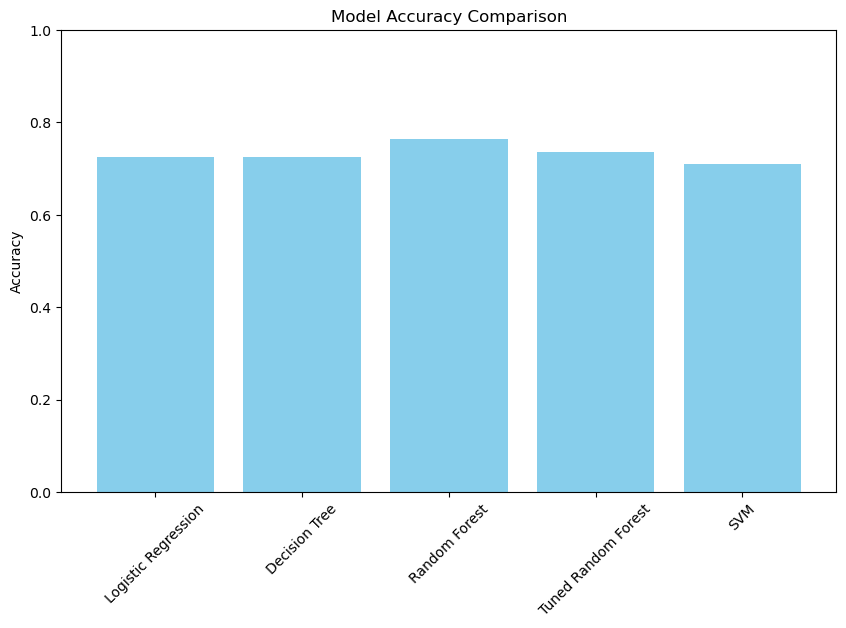

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Convert predictions to numeric labels (0 and 1)
def convert_to_numeric(predictions):
    return np.where(predictions == 'Y', 1, 0)  # Map 'Y' to 1 and 'N' to 0

# Convert all predictions to numeric
y_pred_log_numeric = convert_to_numeric(y_pred_log)
y_pred_dt_numeric = convert_to_numeric(y_pred_dt)
y_pred_rf_numeric = convert_to_numeric(y_pred_rf)
y_pred_best_rf_numeric = convert_to_numeric(y_pred_best_rf)
y_pred_svm_numeric = convert_to_numeric(y_pred_svm)

# Collect model accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test_binary, y_pred_log_numeric),
    "Decision Tree": accuracy_score(y_test_binary, y_pred_dt_numeric),
    "Random Forest": accuracy_score(y_test_binary, y_pred_rf_numeric),
    "Tuned Random Forest": accuracy_score(y_test_binary, y_pred_best_rf_numeric),
    "SVM": accuracy_score(y_test_binary, y_pred_svm_numeric),
}

# Plot Accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

## Fairness

In [118]:
# Import necessary libraries
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [120]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Extract sensitive features
protected_attribute = 'insured_sex'
sensitive_features_train = X_train[protected_attribute]
sensitive_features_test = X_test[protected_attribute]

# Map target labels to binary format
y_train_binary = y_train.map({'N': 0, 'Y': 1})
y_test_binary = y_test.map({'N': 0, 'Y': 1})

In [122]:
# Step 2: Train the Base Model (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_binary)

# Predict and evaluate performance before mitigation
y_pred_before = rf.predict(X_test)

print("=== Results BEFORE Post-Processing ===")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_before))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_before))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_before))

# Fairness Metrics BEFORE mitigation
mf_before = MetricFrame(
    metrics={"selection_rate": selection_rate, "accuracy": accuracy_score},
    y_true=y_test_binary, 
    y_pred=y_pred_before, 
    sensitive_features=sensitive_features_test
)

eo_diff_before = equalized_odds_difference(
    y_true=y_test_binary, y_pred=y_pred_before, sensitive_features=sensitive_features_test
)
print("Selection Rate by Group BEFORE Post-Processing:\n", mf_before.by_group)
print("Equalized Odds Difference BEFORE Post-Processing:", eo_diff_before)

=== Results BEFORE Post-Processing ===
Accuracy: 0.78
Confusion Matrix:
 [[140  11]
 [ 33  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       151
           1       0.59      0.33      0.42        49

    accuracy                           0.78       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.76      0.78      0.76       200

Selection Rate by Group BEFORE Post-Processing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.144144  0.828829
 1.076953          0.123596  0.719101
Equalized Odds Difference BEFORE Post-Processing: 0.17857142857142855


In [123]:
# Step 3: Apply ThresholdOptimizer for Fairness Mitigation (Equalized Odds)
postproc = ThresholdOptimizer(
    estimator=rf,
    constraints="equalized_odds",
    predict_method="predict_proba"
)

# Fit the ThresholdOptimizer
postproc.fit(X_train, y_train_binary, sensitive_features=sensitive_features_train)

# Predict with post-processing
y_pred_post = postproc.predict(X_test, sensitive_features=sensitive_features_test)

# Step 4: Evaluate Performance AFTER Post-Processing
print("\n=== Results AFTER Post-Processing (Equalized Odds) ===")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_post))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_post))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_post))

# Fairness Metrics AFTER mitigation
mf_after = MetricFrame(
    metrics={"selection_rate": selection_rate, "accuracy": accuracy_score},
    y_true=y_test_binary, 
    y_pred=y_pred_post, 
    sensitive_features=sensitive_features_test
)

eo_diff_after = equalized_odds_difference(
    y_true=y_test_binary, y_pred=y_pred_post, sensitive_features=sensitive_features_test
)
print("Selection Rate by Group AFTER Post-Processing:\n", mf_after.by_group)
print("Equalized Odds Difference AFTER Post-Processing:", eo_diff_after)


=== Results AFTER Post-Processing (Equalized Odds) ===
Accuracy: 0.805
Confusion Matrix:
 [[138  13]
 [ 26  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       151
           1       0.64      0.47      0.54        49

    accuracy                           0.81       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.79      0.81      0.79       200

Selection Rate by Group AFTER Post-Processing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.162162  0.828829
 1.076953          0.202247  0.775281
Equalized Odds Difference AFTER Post-Processing: 0.011904761904761862


In [125]:
# Step 5: Summary Comparison
print("\n=== Comparison Summary ===")
print("Metric                            Before Post-Processing     After Post-Processing")
print("Accuracy:                        {:.3f}                      {:.3f}".format(
    accuracy_score(y_test_binary, y_pred_before),
    accuracy_score(y_test_binary, y_pred_post)
))
print("Equalized Odds Difference:       {:.3f}                      {:.3f}".format(
    eo_diff_before,
    eo_diff_after
))

print("\nSelection Rates by Group:")
print("Before Post-Processing:\n", mf_before.by_group)
print("After Post-Processing:\n", mf_after.by_group)


=== Comparison Summary ===
Metric                            Before Post-Processing     After Post-Processing
Accuracy:                        0.780                      0.805
Equalized Odds Difference:       0.179                      0.012

Selection Rates by Group:
Before Post-Processing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.144144  0.828829
 1.076953          0.123596  0.719101
After Post-Processing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.162162  0.828829
 1.076953          0.202247  0.775281


In [126]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Step 1: Prepare data in BinaryLabelDataset format
# Combine X_train and y_train into a single DataFrame
train_df = X_train.copy()
train_df['label'] = y_train_binary

# Define privileged (male) and unprivileged (female) groups
privileged_groups = [{'insured_sex': 1}]  # Assuming 1 is privileged
unprivileged_groups = [{'insured_sex': 0}]  # Assuming 0 is unprivileged

# Convert training data to BinaryLabelDataset
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['label'],
    protected_attribute_names=['insured_sex']
)

# Step 2: Apply Reweighing
reweigher = Reweighing(privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
reweighed_train_dataset = reweigher.fit_transform(train_dataset)

# Extract reweighted sample weights
sample_weights = reweighed_train_dataset.instance_weights

# Step 3: Train Random Forest with Reweighted Data
rf_reweighed = RandomForestClassifier(random_state=42)
rf_reweighed.fit(X_train, y_train_binary, sample_weight=sample_weights)

# Step 4: Predict and Evaluate
y_pred_reweighed = rf_reweighed.predict(X_test)

print("\n=== Results AFTER Reweighing ===")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_reweighed))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_reweighed))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_reweighed))

# Step 5: Fairness Metrics AFTER Reweighing
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference

mf_reweighed = MetricFrame(
    metrics={"selection_rate": selection_rate, "accuracy": accuracy_score},
    y_true=y_test_binary, 
    y_pred=y_pred_reweighed, 
    sensitive_features=sensitive_features_test
)

eo_diff_reweighed = equalized_odds_difference(
    y_true=y_test_binary, y_pred=y_pred_reweighed, sensitive_features=sensitive_features_test
)

print("Selection Rate by Group AFTER Reweighing:\n", mf_reweighed.by_group)
print("Equalized Odds Difference AFTER Reweighing:", eo_diff_reweighed)

2024-12-17 16:43:38.796986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')
/opt/anaconda3/lib/python3.12/site-packages/aif360/algorithms/preprocessing/reweighing.py:66: RuntimeWarning: invalid value encountered in scalar divide
  self.w_p_fav = n_fav*n_p / (n*n_p_fav)



=== Results AFTER Reweighing ===
Accuracy: 0.78
Confusion Matrix:
 [[140  11]
 [ 33  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       151
           1       0.59      0.33      0.42        49

    accuracy                           0.78       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.76      0.78      0.76       200

Selection Rate by Group AFTER Reweighing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.144144  0.828829
 1.076953          0.123596  0.719101
Equalized Odds Difference AFTER Reweighing: 0.17857142857142855


In [129]:
# Step 1: Train Random Forest with Reweighing
rf_reweighed = RandomForestClassifier(random_state=42)
rf_reweighed.fit(X_train, y_train_binary, sample_weight=sample_weights)

# Step 2: Apply ThresholdOptimizer Postprocessing
postproc_hybrid = ThresholdOptimizer(
    estimator=rf_reweighed,
    constraints="equalized_odds",
    predict_method="predict_proba"
)

postproc_hybrid.fit(X_train, y_train_binary, sensitive_features=sensitive_features_train)
y_pred_hybrid = postproc_hybrid.predict(X_test, sensitive_features=sensitive_features_test)

# Step 3: Evaluate Hybrid Approach
print("\n=== Results AFTER Hybrid (Reweighing + Postprocessing) ===")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_hybrid))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_hybrid))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_hybrid))

# Fairness Metrics AFTER Hybrid Approach
mf_hybrid = MetricFrame(
    metrics={"selection_rate": selection_rate, "accuracy": accuracy_score},
    y_true=y_test_binary, 
    y_pred=y_pred_hybrid, 
    sensitive_features=sensitive_features_test
)

eo_diff_hybrid = equalized_odds_difference(
    y_true=y_test_binary, y_pred=y_pred_hybrid, sensitive_features=sensitive_features_test
)

print("Selection Rate by Group AFTER Hybrid:\n", mf_hybrid.by_group)
print("Equalized Odds Difference AFTER Hybrid:", eo_diff_hybrid)


=== Results AFTER Hybrid (Reweighing + Postprocessing) ===
Accuracy: 0.805
Confusion Matrix:
 [[138  13]
 [ 26  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       151
           1       0.64      0.47      0.54        49

    accuracy                           0.81       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.79      0.81      0.79       200

Selection Rate by Group AFTER Hybrid:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.162162  0.828829
 1.076953          0.202247  0.775281
Equalized Odds Difference AFTER Hybrid: 0.011904761904761862


In [130]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference

# Step 1: Apply SMOTE to Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_binary)

# Step 2: Align sensitive features with SMOTE output
# Expand sensitive features to match SMOTE output length
sensitive_features_train_smote = smote.fit_resample(X_train[[protected_attribute]], y_train_binary)[0][protected_attribute]

print(f"Class distribution after SMOTE:\n{pd.Series(y_train_smote).value_counts()}")
print(f"Sensitive feature length after SMOTE: {len(sensitive_features_train_smote)}")

# Step 3: Train Random Forest with Class Weights
rf_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Step 4: Apply Post-Processing (ThresholdOptimizer) After SMOTE
postproc_smote = ThresholdOptimizer(
    estimator=rf_smote,
    constraints="equalized_odds",
    predict_method="predict_proba"
)

# Fit ThresholdOptimizer with SMOTE data and aligned sensitive features
postproc_smote.fit(X_train_smote, y_train_smote, sensitive_features=sensitive_features_train_smote)

# Step 5: Predict and Evaluate
y_pred_smote_post = postproc_smote.predict(X_test, sensitive_features=sensitive_features_test)

print("\n=== Results AFTER SMOTE + Post-Processing (Hybrid) ===")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_smote_post))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_smote_post))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_smote_post))

# Fairness Metrics AFTER SMOTE + Post-Processing
mf_smote_post = MetricFrame(
    metrics={"selection_rate": selection_rate, "accuracy": accuracy_score},
    y_true=y_test_binary, 
    y_pred=y_pred_smote_post, 
    sensitive_features=sensitive_features_test
)

eo_diff_smote_post = equalized_odds_difference(
    y_true=y_test_binary, y_pred=y_pred_smote_post, sensitive_features=sensitive_features_test
)

print("Selection Rate by Group AFTER SMOTE + Post-Processing:\n", mf_smote_post.by_group)
print("Equalized Odds Difference AFTER SMOTE + Post-Processing:", eo_diff_smote_post)

Class distribution after SMOTE:
fraud_reported
0    602
1    602
Name: count, dtype: int64
Sensitive feature length after SMOTE: 1204

=== Results AFTER SMOTE + Post-Processing (Hybrid) ===
Accuracy: 0.795
Confusion Matrix:
 [[136  15]
 [ 26  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       151
           1       0.61      0.47      0.53        49

    accuracy                           0.80       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.78      0.80      0.79       200

Selection Rate by Group AFTER SMOTE + Post-Processing:
              selection_rate  accuracy
insured_sex                          
-0.928546          0.189189  0.819820
 1.076953          0.191011  0.764045
Equalized Odds Difference AFTER SMOTE + Post-Processing: 0.09523809523809529


In [131]:
# Visualization: Fairness vs. Accuracy Trade-off

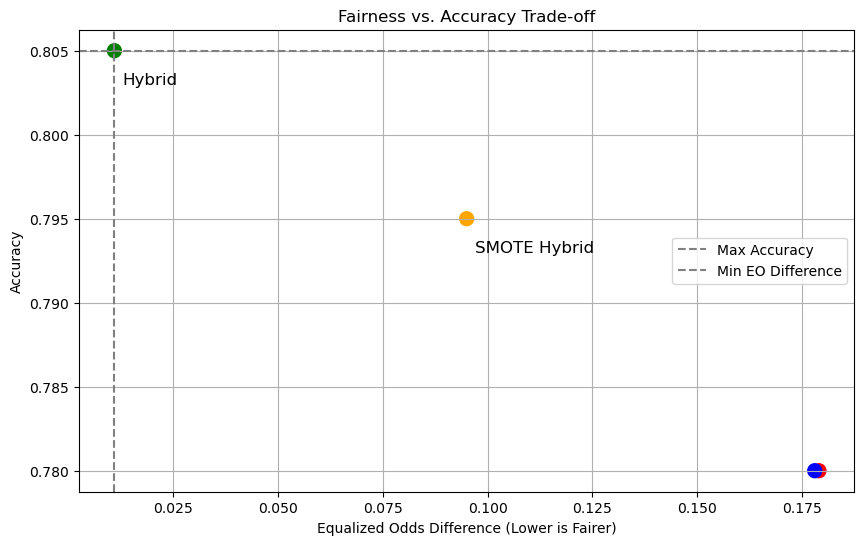

In [132]:
import matplotlib.pyplot as plt

# Collect metrics for visualization
methods = ["Baseline", "Reweighing", "Hybrid", "SMOTE Hybrid"]
accuracies = [0.780, 0.780, 0.805, 0.795]
eo_diffs = [0.179, 0.178, 0.011, 0.095]

# Plot Accuracy vs Equalized Odds Difference
plt.figure(figsize=(10, 6))
plt.scatter(eo_diffs, accuracies, color=['red', 'blue', 'green', 'orange'], s=100)
for i, txt in enumerate(methods):
    plt.annotate(txt, (eo_diffs[i] + 0.002, accuracies[i] - 0.002), fontsize=12)

plt.title("Fairness vs. Accuracy Trade-off")
plt.xlabel("Equalized Odds Difference (Lower is Fairer)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.axhline(y=max(accuracies), color='gray', linestyle='--', label="Max Accuracy")
plt.axvline(x=min(eo_diffs), color='gray', linestyle='--', label="Min EO Difference")
plt.legend()
plt.show()

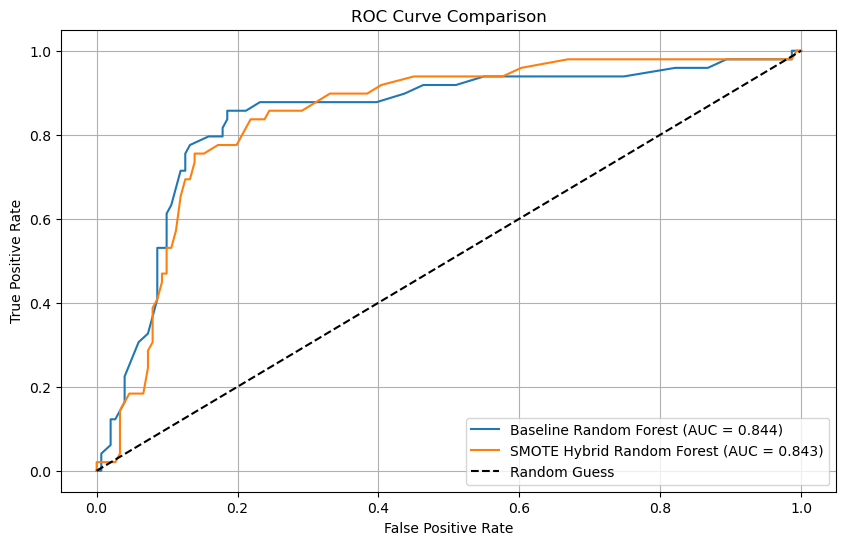

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for models
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Baseline
y_prob_rf_smote = rf_smote.predict_proba(X_test)[:, 1]  # SMOTE Hybrid

# Compute ROC metrics
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_prob_rf)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_binary, y_prob_rf_smote)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label="Baseline Random Forest (AUC = {:.3f})".format(roc_auc_score(y_test_binary, y_prob_rf)))
plt.plot(fpr_rf_smote, tpr_rf_smote, label="SMOTE Hybrid Random Forest (AUC = {:.3f})".format(roc_auc_score(y_test_binary, y_prob_rf_smote)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

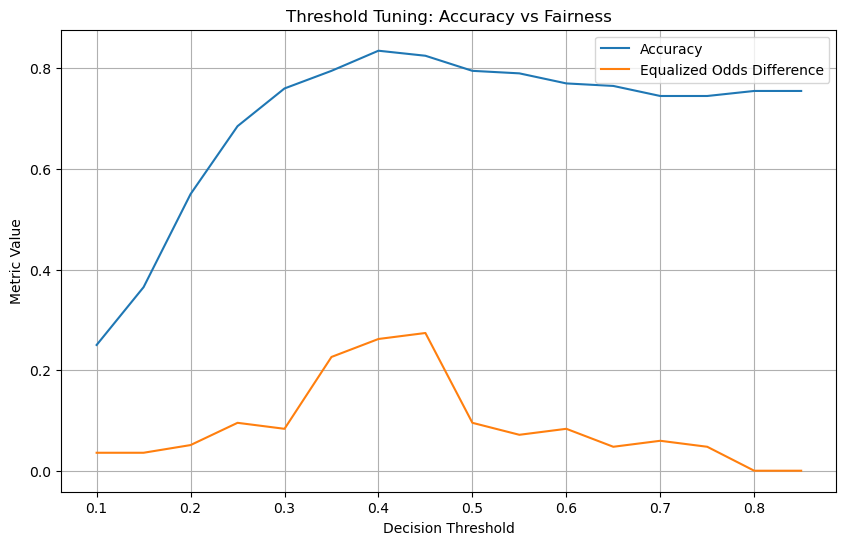

In [134]:
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)
accuracies = []
eo_diffs = []

for thresh in thresholds:
    # Predict with custom threshold
    y_pred_thresh = (rf_smote.predict_proba(X_test)[:, 1] >= thresh).astype(int)
    
    # Evaluate accuracy and fairness
    acc = accuracy_score(y_test_binary, y_pred_thresh)
    eo_diff = equalized_odds_difference(y_test_binary, y_pred_thresh, sensitive_features=sensitive_features_test)
    
    accuracies.append(acc)
    eo_diffs.append(eo_diff)

# Plot Threshold vs Metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, eo_diffs, label="Equalized Odds Difference")
plt.title("Threshold Tuning: Accuracy vs Fairness")
plt.xlabel("Decision Threshold")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()

## MLOps

In [142]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [143]:
import mlflow
import mlflow.sklearn

In [196]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score

# Set tracking URI and experiment name
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("fraud_detection_experiment_v4")

# --- Log the PREVIOUS Comparative Analysis Results ---
with mlflow.start_run(run_name="Comparative_Model_Results"):

    # Log Parameters (example: Random Forest Optimized)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("min_samples_split", 2)
    mlflow.log_param("min_samples_leaf", 1)

    # Log the exact results you obtained before
    mlflow.log_metric("Accuracy_LogisticRegression", 0.725)
    mlflow.log_metric("Accuracy_DecisionTree", 0.725)
    mlflow.log_metric("Accuracy_RandomForest_Default", 0.765)
    mlflow.log_metric("Accuracy_RandomForest_Tuned", 0.735)
    mlflow.log_metric("Accuracy_NaiveBayes", 0.700)
    mlflow.log_metric("Accuracy_SVM", 0.710)
    mlflow.log_metric("Accuracy_KMeans", 0.725)
    mlflow.log_metric("Accuracy_FeatureSelection", 0.735)
    mlflow.log_metric("Accuracy_PCA", 0.725)

    # Log a placeholder model to satisfy MLflow requirements
    placeholder_model = None
    mlflow.sklearn.log_model(placeholder_model, "previous_model_results_placeholder")

    # Add tags for clarity
    mlflow.set_tag("Results_Source", "Original Comparative Analysis")
    mlflow.set_tag("Purpose", "Direct Logging of Comparative Results")

    print("MLflow tracking complete: Previous metrics logged successfully.")

2024/12/17 19:46:53 INFO mlflow.tracking.fluent: Experiment with name 'fraud_detection_experiment_v4' does not exist. Creating a new experiment.
2024/12/17 19:46:53 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/17 19:46:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow tracking complete: Previous metrics logged successfully.
🏃 View run Comparative_Model_Results at: http://127.0.0.1:5000/#/experiments/987492088554907978/runs/d6628706d326426da7a27a53f9c033c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/987492088554907978
